In [39]:
import numpy as np
import cv2 as cv 
import imutils
import matplotlib.pyplot as plt

In [40]:
img = cv.imread('img.jpeg')
template = cv.imread('template.jpeg')

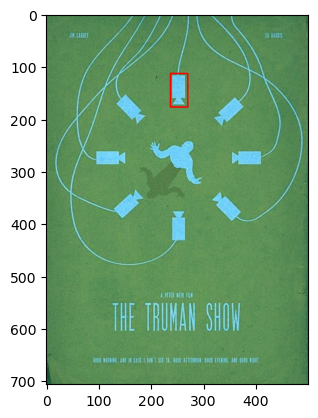

In [41]:
match = cv.matchTemplate(img, template, cv.TM_CCOEFF_NORMED)
image_dis = img.copy()

min_val , max_val, min_loc, max_loc = cv. minMaxLoc(match)
top_left = max_loc
bottom_right = (top_left[0] + template.shape[1], top_left[1] + template.shape[0])

cv.rectangle(image_dis,top_left,bottom_right, (255,0,0),2)

plt.imshow(image_dis)

## part B

In [42]:
tmpl_90 = cv.rotate(template, cv.ROTATE_90_CLOCKWISE)
tmpl_90_i = cv.rotate(template,cv.ROTATE_90_COUNTERCLOCKWISE)

tmpl_180 = cv.rotate(template, cv.ROTATE_180)


tmpl_45 = imutils.rotate(template, 45)

tmpl_135 = imutils.rotate(template, 135)

tmpl_45_i = imutils.rotate(template, -45)

tmpl_135_i = imutils.rotate(template, -135)

list_rotate =[template, tmpl_90, tmpl_90_i, tmpl_180,tmpl_45,tmpl_135,tmpl_45_i,tmpl_135_i]

In [43]:
def match_function(img_detected,tmpl):
    match = cv.matchTemplate(img_detected, tmpl, cv.TM_CCOEFF_NORMED)
    
    min_val , max_val, min_loc, max_loc = cv. minMaxLoc(match)
    top_left = max_loc
    bottom_right = (top_left[0] + tmpl.shape[1], top_left[1] + tmpl.shape[0])

    cv.rectangle(img_detected,top_left,bottom_right, (255,0,0),2)
    plt.imshow(img_detected)
    return img_detected

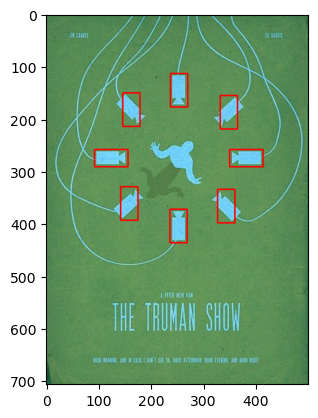

In [44]:
for i in range(0,len(list_rotate)):
    match_function(img,list_rotate[i])

In [46]:
for i in range(0,len(list_rotate)):
    cv.imwrite('{}.jpg'.format(i),list_rotate[i])